# NCBI Hackathon - Fair Data

## Shoe #2 - Variable Cleanup 

### The variable name: LasikGLCLCLSEScl

### Survey Question: How much of the time do you expect to use glasses or contact lenses to see things up close after healing from LASIK surgery? 

1. All of the time
2. Most of the time
3. Some of the time
4. Hardly ever
5. Never

... and of course we have 'NA' in our data

In [48]:
# The library you need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [49]:
#get a sense of the original data set
df = pd.read_csv('query_result_PROWL_Dem.csv').iloc[:,4:]
df.head()

,PROWL_Demo_2V1.0.Main.SubjectIDNumLasik,PROWL_Demo_2V1.0.Main.AgeYrs,PROWL_Demo_2V1.0.Main.GenderTyp,PROWL_Demo_2V1.0.Main.RaceUSACat,PROWL_Demo_2V1.0.Main.EthnUSACat,PROWL_Demo_2V1.0.Main.LASIKPROWLCohort,PROWL_Demo_2V1.0.Main.GeneralNotesTxt,PROWL_LASIK_PostOpV1.0.Study ID,PROWL_LASIK_PostOpV1.0.Dataset,PROWL_LASIK_PostOpV1.0.Main.GUID,...,PROWL_LASIK_PreOp2V1.0.Lasik Questionnaire.LasikACMPTASKScl,PROWL_LASIK_PreOp2V1.0.Lasik Questionnaire.LasikMASTTASKScl,PROWL_LASIK_PreOp2V1.0.Lasik Questionnaire.LasikGLCLCLSEScl,PROWL_LASIK_PreOp2V1.0.General.LasikMINUTESTimDur,PROWL_LASIK_PreOp2V1.0.General.LasikQULENGTHScl,PROWL_LASIK_PreOp2V1.0.General.LasikCOMPPROBScl,PROWL_LASIK_PreOp2V1.0.General.LasikINTCOMPScl,PROWL_LASIK_PreOp2V1.0.General.LasikCOMMENTSTxt,PROWL_LASIK_PreOp2V1.0.General.LasikEDUCATIONTyp,PROWL_LASIK_PreOp2V1.0.General.LasikHHINCOMERng
0,1856,24,Male,White,Not Hispanic or Latino,PROWL,NaN,204,EYEGENE-DATA0000291,NEI_INVHR969PA3,...,3.0,4.0,5.0,35.0,3.0,2.0,3.0,NaN,4.0,1.0
1,824,29,Male,Unknown,Hispanic or Latino,PROWL,Brazilian/Italian,204,EYEGENE-DATA0000291,NEI_INVBP664MC0,...,3.0,3.0,4.0,45.0,4.0,1.0,1.0,NaN,4.0,3.0
2,1074,21,Male,White,Not Hispanic or Latino,PRWL2,NaN,204,EYEGENE-DATA0000291,NEI_INVJA185WLP,...,4.0,4.0,5.0,25.0,3.0,1.0,1.0,NaN,4.0,6.0
3,1581,38,Male,White,Not Hispanic or Latino,PROWL,NaN,204,EYEGENE-DATA0000291,NEI_INVJM238FBA,...,3.0,3.0,4.0,45.0,4.0,1.0,1.0,Some of the questions I was not sure if you me...,6.0,6.0
4,1268,48,Female,White,Not Hispanic or Latino,PRWL2,NaN,204,EYEGENE-DATA0000291,NEI_INVEV925NNY,...,4.0,4.0,3.0,20.0,3.0,1.0,3.0,NaN,4.0,4.0


In [102]:
df.shape

(1301, 261)

In [104]:
# the column names you need
col_needed = ['PROWL_Demo_2V1.0.Main.SubjectIDNumLasik', 'PROWL_Demo_2V1.0.Main.AgeYrs', 'PROWL_Demo_2V1.0.Main.GenderTyp',
             'PROWL_Demo_2V1.0.Main.RaceUSACat', 'PROWL_Demo_2V1.0.Main.EthnUSACat','PROWL_Demo_2V1.0.Main.LASIKPROWLCohort',
             'PROWL_LASIK_PreOp2V1.0.Form Administration.VisitNoLasik', 'PROWL_LASIK_PreOp2V1.0.Lasik Questionnaire.LasikGLCLCLSEScl']

In [105]:
#make a new dataframe based on the question that you are interested
new_df = df[col_needed]

In [106]:
#nan_rows = new_df[new_df['PROWL_LASIK_PreOp2V1.0.Lasik Questionnaire.LasikGLCLCLSEScl'].isnull()]

In [107]:
#nan_rows

In [108]:
len(new_df['PROWL_Demo_2V1.0.Main.SubjectIDNumLasik'].unique())

532

In [109]:
new_df.loc[new_df['PROWL_Demo_2V1.0.Main.SubjectIDNumLasik'] == 1856, :]

,PROWL_Demo_2V1.0.Main.SubjectIDNumLasik,PROWL_Demo_2V1.0.Main.AgeYrs,PROWL_Demo_2V1.0.Main.GenderTyp,PROWL_Demo_2V1.0.Main.RaceUSACat,PROWL_Demo_2V1.0.Main.EthnUSACat,PROWL_Demo_2V1.0.Main.LASIKPROWLCohort,PROWL_LASIK_PreOp2V1.0.Form Administration.VisitNoLasik,PROWL_LASIK_PreOp2V1.0.Lasik Questionnaire.LasikGLCLCLSEScl
0,1856,24,Male,White,Not Hispanic or Latino,PROWL,0,5.0
166,1856,24,Male,White,Not Hispanic or Latino,PROWL,0,5.0
470,1856,24,Male,White,Not Hispanic or Latino,PROWL,0,5.0


In [111]:
#drop the duplicate rows
new_df.drop_duplicates(inplace = True)

In [112]:
new_df.shape

(532, 8)

In [113]:
new_df.rename(columns=lambda x: x.split('.')[-1], inplace=True)

In [114]:
new_df.head()

,SubjectIDNumLasik,AgeYrs,GenderTyp,RaceUSACat,EthnUSACat,LASIKPROWLCohort,VisitNoLasik,LasikGLCLCLSEScl
0,1856,24,Male,White,Not Hispanic or Latino,PROWL,0,5.0
1,824,29,Male,Unknown,Hispanic or Latino,PROWL,0,4.0
2,1074,21,Male,White,Not Hispanic or Latino,PRWL2,0,5.0
3,1581,38,Male,White,Not Hispanic or Latino,PROWL,0,4.0
4,1268,48,Female,White,Not Hispanic or Latino,PRWL2,0,3.0


In [38]:
# save the dataframe to a new csv file
new_df.to_csv('new_df.csv')

<IPython.core.display.Javascript object>


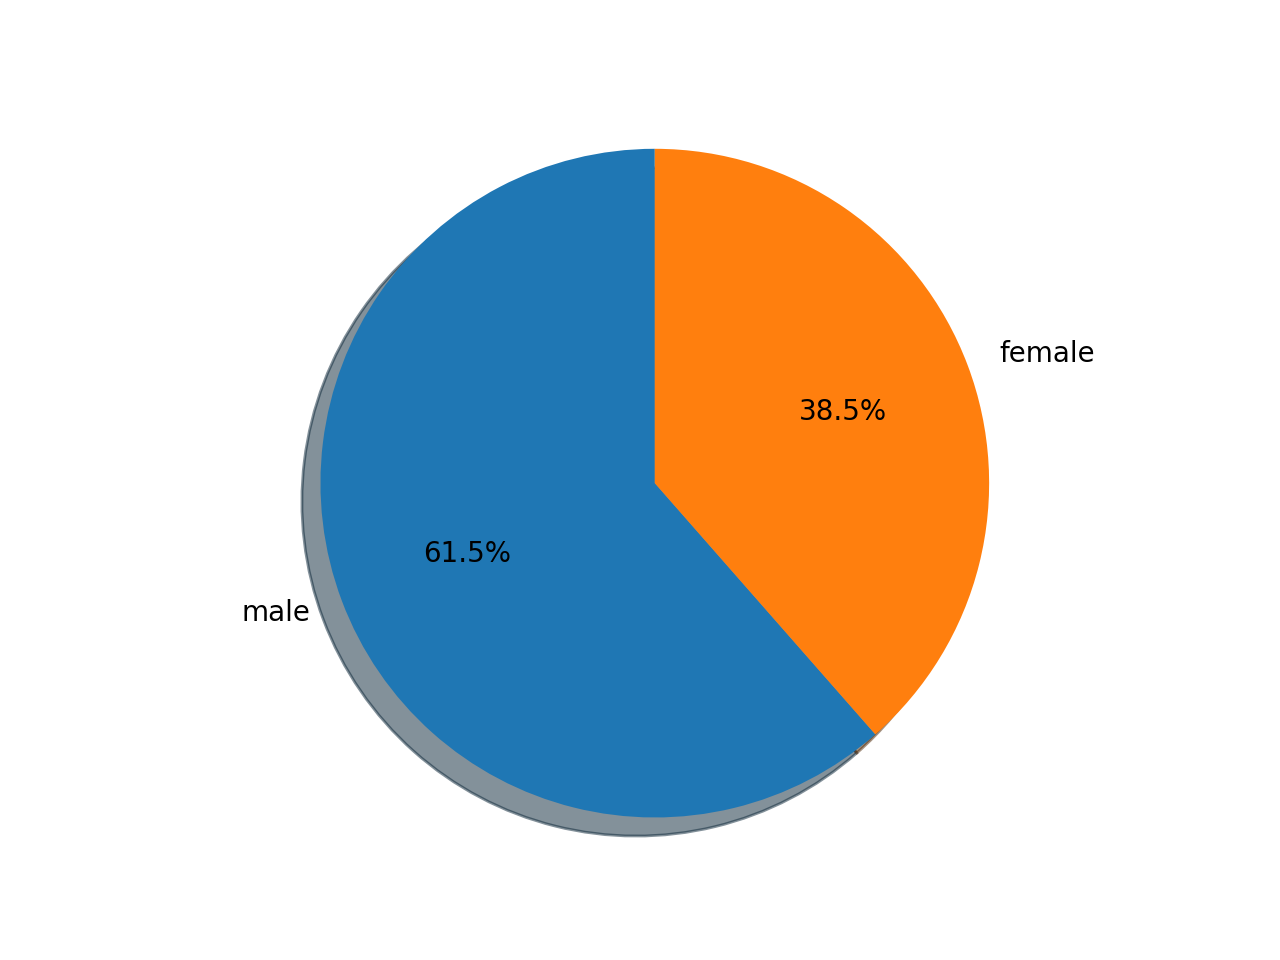

(-1.1138511755542908,
 1.121028918246873,
 -1.110455106740067,
 1.1004978622257175)

In [115]:
%matplotlib notebook
gender = ['male', 'female']
number = [327, 205]
fig1, ax1 = plt.subplots()
ax1.pie(number, labels=gender, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

In [80]:
#sns.set(style="whitegrid")

In [22]:
#new_df['answer']=new_df['LasikGLCLCLSEScl'].map({1:'All of the time',2:'Most of the time', 3:'Some of the time', 4:'Hardly ever',
                                            #5:' Never'})

In [116]:
new_df['LasikGLCLCLSEScl'] = new_df['LasikGLCLCLSEScl'].fillna(0)

In [117]:
new_df['LasikGLCLCLSEScl'].isna().any()

False

<IPython.core.display.Javascript object>


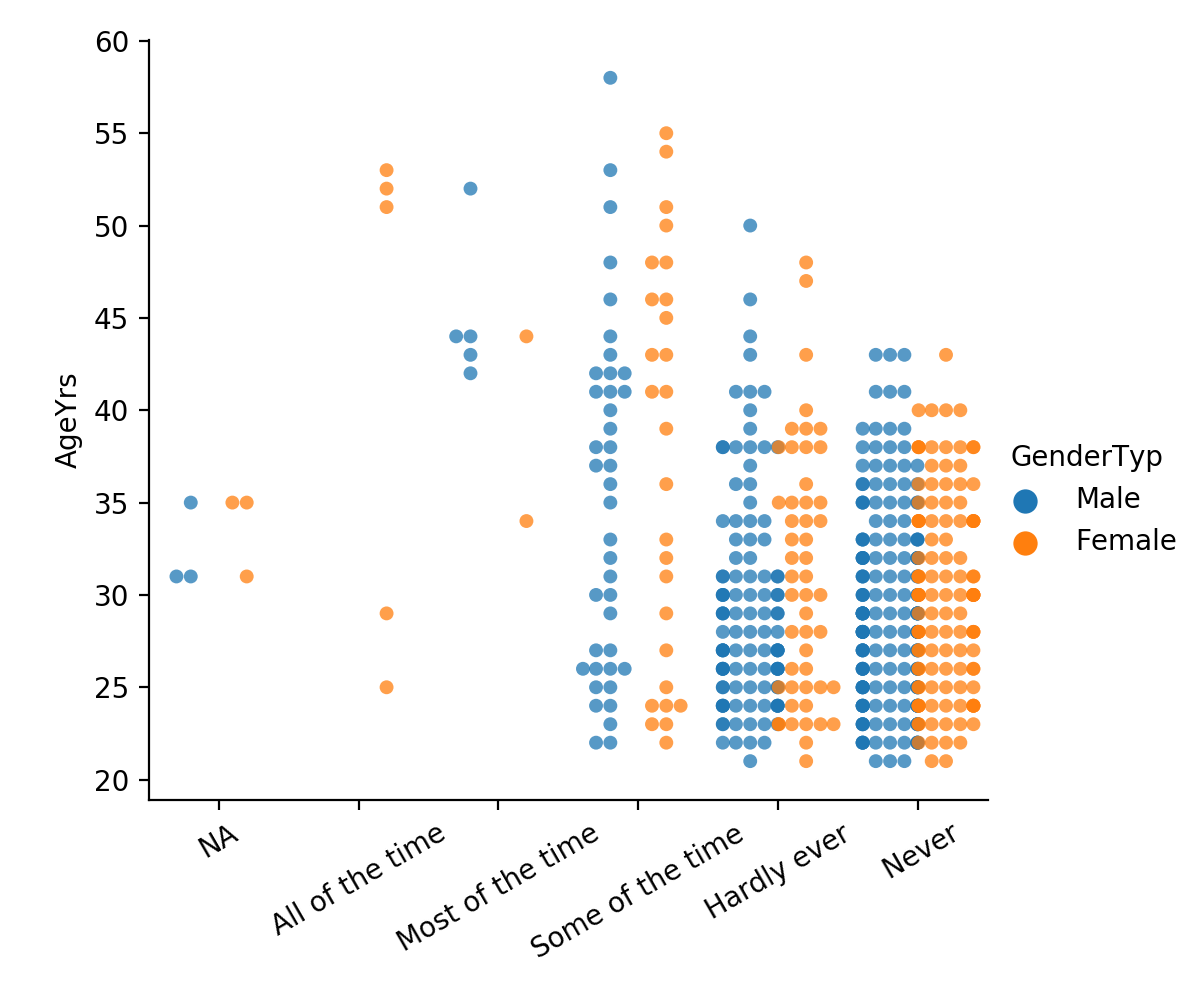

In [101]:
g = sns.catplot(y ="AgeYrs", x="LasikGLCLCLSEScl", data=new_df, kind="swarm", hue = 'GenderTyp', split = True, alpha = 0.75)
g.set_xticklabels(rotation=30)
plt.subplots_adjust(bottom=0.2)
plt.xlabel('', alpha=0.8)
g.set_xticklabels(['NA', 'All of the time','Most of the time', 'Some of the time', 'Hardly ever', ' Never'])
#plt.title('How much of the time do you expect to use glasses or contact lenses to see things up close after healing from LASIK surgery?') 
plt.savefig('a.pdf')